# <H1><center> Arrests and Strip Searches</center></H1>

<center> Master of Information<br>
INF2178:Experimental Design for Data Science<br>
Professor: Shion Guha<br>
Student name: Anning Wang, Jiani Gu<br>
Date: Feb 23, 2023<br>
Link of Database: https://data.torontopolice.on.ca/datasets/TorontoPS::arrests-and-strip-searches-rbdc-arr-tbl-001/about</center>

## 1.Introduction

### 1.1Research Question
RQ 1: What is the rate of strip searches on different races of suspects in arrests in Toronto?

RQ 2: How does arrest location affect the likelihood of being strip searched for different races of suspects?

## 2.EDA

### 2.1Data Overview and Analysis


In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import statsmodels.api as sm
from statsmodels.formula.api import ols
 

In [253]:
#Perview data
df =  pd.read_csv("https://raw.githubusercontent.com/shionguha/inf2178-expdesignfordatascience-w23/main/project%20dataset/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv")
df.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5


In [254]:
df.describe() #See the description of continuous variables

,Arrest_Year,EventID,ArrestID,PersonID,StripSearch,Booked,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
count,65276.000000,6.527600e+04,6.480700e+04,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,7801.000000,7801.000000,7801.000000,7801.000000,7801.000000,65276.000000
mean,2020.510096,1.029998e+06,6.032402e+06,318599.919695,0.119508,0.519502,0.004075,0.044136,0.038330,0.033381,0.006358,0.445937,0.765671,0.343161,0.453403,0.418921,0.373157,32638.500000
std,0.499902,1.731809e+04,1.870751e+04,10815.387928,0.324388,0.499623,0.063706,0.205398,0.191992,0.179632,0.079481,0.497072,0.423606,0.474795,0.497856,0.493414,0.483674,18843.702423
min,2020.000000,1.000000e+06,6.000000e+06,300000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2020.000000,1.015001e+06,6.016202e+06,309215.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,16319.750000
50%,2021.000000,1.030006e+06,6.032402e+06,318595.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,32638.500000
75%,2021.000000,1.044996e+06,6.048602e+06,327926.250000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,48957.250000
max,2021.000000,1.060002e+06,6.064804e+06,337346.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,65276.000000


In [255]:
df.describe(include=['O']) #See the description of categorical variables

,Arrest_Month,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,Occurrence_Category
count,65276,65272,65276,65252,65276,65276,65111
unique,4,8,3,9,3,18,31
top,Jan-Mar,White,M,Aged 25 to 34 years,Not a youth,XX,Assault
freq,17613,27723,52650,20949,62234,29646,7726


In [239]:
df.dtypes #check data type

Arrest_Year                          int64
Arrest_Month                        object
EventID                              int64
ArrestID                           float64
PersonID                             int64
Perceived_Race                      object
Sex                                 object
Age_group__at_arrest_               object
Youth_at_arrest__under_18_years     object
ArrestLocDiv                        object
StripSearch                          int64
Booked                               int64
Occurrence_Category                 object
Actions_at_arrest___Concealed_i      int64
Actions_at_arrest___Combative__      int64
Actions_at_arrest___Resisted__d      int64
Actions_at_arrest___Mental_inst      int64
Actions_at_arrest___Assaulted_o      int64
Actions_at_arrest___Cooperative      int64
SearchReason_CauseInjury           float64
SearchReason_AssistEscape          float64
SearchReason_PossessWeapons        float64
SearchReason_PossessEvidence       float64
ItemsFound 

In [240]:
df.shape #check number of row and column

(65276, 25)

In [241]:
duplicate_rows_df = df[df.duplicated()]#check the duplicate value
print('number of duplicate rows: ', duplicate_rows_df.shape)

number of duplicate rows:  (0, 25)


In [242]:
print(df.isnull().sum()) #check missing value

Arrest_Year                            0
Arrest_Month                           0
EventID                                0
ArrestID                             469
PersonID                               0
Perceived_Race                         4
Sex                                    0
Age_group__at_arrest_                 24
Youth_at_arrest__under_18_years        0
ArrestLocDiv                           0
StripSearch                            0
Booked                                 0
Occurrence_Category                  165
Actions_at_arrest___Concealed_i        0
Actions_at_arrest___Combative__        0
Actions_at_arrest___Resisted__d        0
Actions_at_arrest___Mental_inst        0
Actions_at_arrest___Assaulted_o        0
Actions_at_arrest___Cooperative        0
SearchReason_CauseInjury           57475
SearchReason_AssistEscape          57475
SearchReason_PossessWeapons        57475
SearchReason_PossessEvidence       57475
ItemsFound                         57475
ObjectId        

In [243]:
df.drop("SearchReason_CauseInjury",axis=1, inplace=True) #delete some data we are not explore in this work
df.drop("SearchReason_AssistEscape",axis=1, inplace=True)
df.drop("SearchReason_PossessWeapons",axis=1, inplace=True)
df.drop("SearchReason_PossessEvidence",axis=1, inplace=True)
df.drop("ItemsFound",axis=1, inplace=True)
df.drop("ArrestID",axis=1, inplace=True)
df.drop("Occurrence_Category",axis=1, inplace=True)

In [244]:
print(df.isnull().sum())

Arrest_Year                         0
Arrest_Month                        0
EventID                             0
PersonID                            0
Perceived_Race                      4
Sex                                 0
Age_group__at_arrest_              24
Youth_at_arrest__under_18_years     0
ArrestLocDiv                        0
StripSearch                         0
Booked                              0
Actions_at_arrest___Concealed_i     0
Actions_at_arrest___Combative__     0
Actions_at_arrest___Resisted__d     0
Actions_at_arrest___Mental_inst     0
Actions_at_arrest___Assaulted_o     0
Actions_at_arrest___Cooperative     0
ObjectId                            0
dtype: int64


In [245]:
for f in df:  # The data has missing values, which are filled by interpolation
    df = df.interpolate()
    df.dropna(inplace=True)

In [246]:
print(df.isnull().sum())

Arrest_Year                        0
Arrest_Month                       0
EventID                            0
PersonID                           0
Perceived_Race                     0
Sex                                0
Age_group__at_arrest_              0
Youth_at_arrest__under_18_years    0
ArrestLocDiv                       0
StripSearch                        0
Booked                             0
Actions_at_arrest___Concealed_i    0
Actions_at_arrest___Combative__    0
Actions_at_arrest___Resisted__d    0
Actions_at_arrest___Mental_inst    0
Actions_at_arrest___Assaulted_o    0
Actions_at_arrest___Cooperative    0
ObjectId                           0
dtype: int64


In [247]:
#checks how many 0s in each catogory
df.eq(0).sum()

Arrest_Year                            0
Arrest_Month                           0
EventID                                0
PersonID                               0
Perceived_Race                         0
Sex                                    0
Age_group__at_arrest_                  0
Youth_at_arrest__under_18_years        0
ArrestLocDiv                           0
StripSearch                        57448
Booked                             31343
Actions_at_arrest___Concealed_i    64982
Actions_at_arrest___Combative__    62368
Actions_at_arrest___Resisted__d    62748
Actions_at_arrest___Mental_inst    63070
Actions_at_arrest___Assaulted_o    64833
Actions_at_arrest___Cooperative    36147
ObjectId                               0
dtype: int64

3


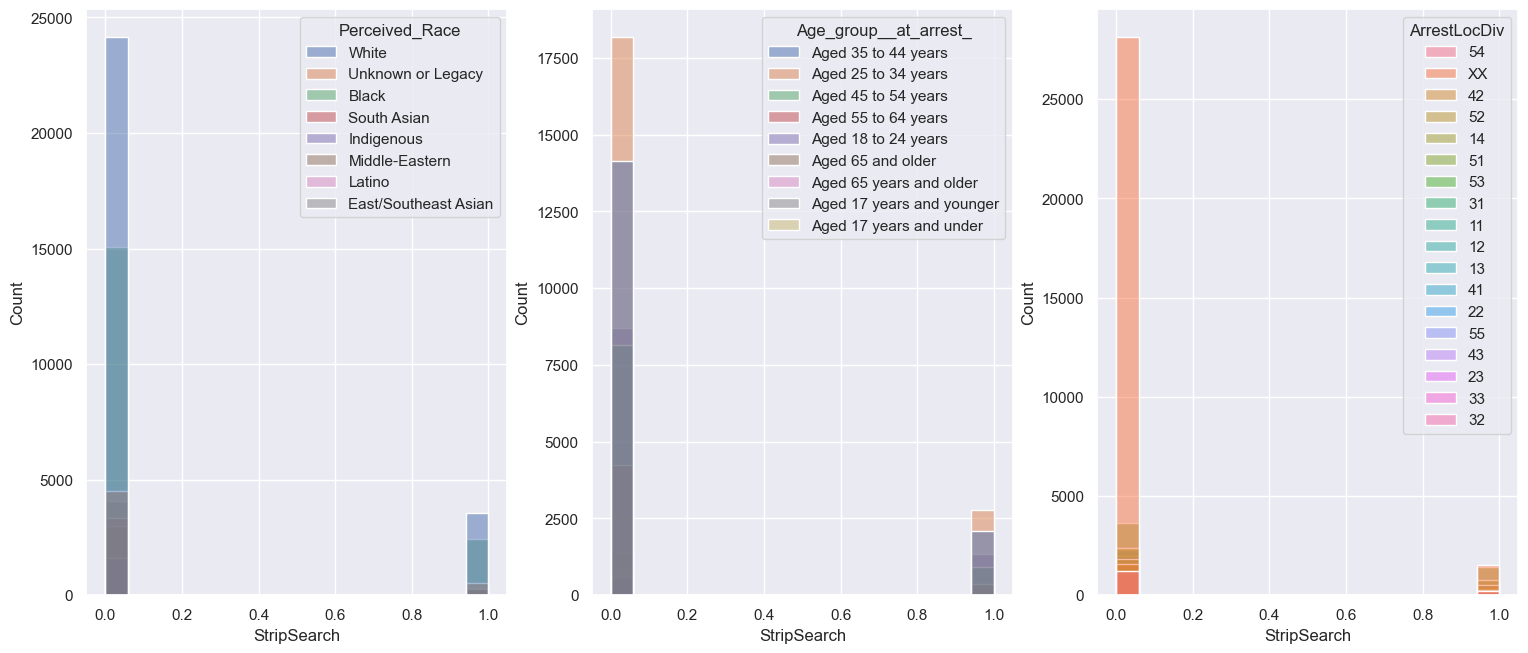

In [248]:
# What is the proportion of each ratio of 0 and 1
feature_names = ['Perceived_Race','Age_group__at_arrest_','ArrestLocDiv']
print(len(feature_names))
fig =plt.subplots(figsize = (25,35))
sns.set(font_scale = 1)
i=1
for name in feature_names:
    plt.subplot(4,4,i)
    sns.histplot(data=df, x="StripSearch", hue=name)
    i+=1

StripSearch,0,1
Perceived_Race,,
Black,15084,2434
East/Southeast Asian,4071,341
Indigenous,1626,306
Latino,1636,132
Middle-Eastern,3009,228
South Asian,3356,257
Unknown or Legacy,4519,536
White,24147,3566


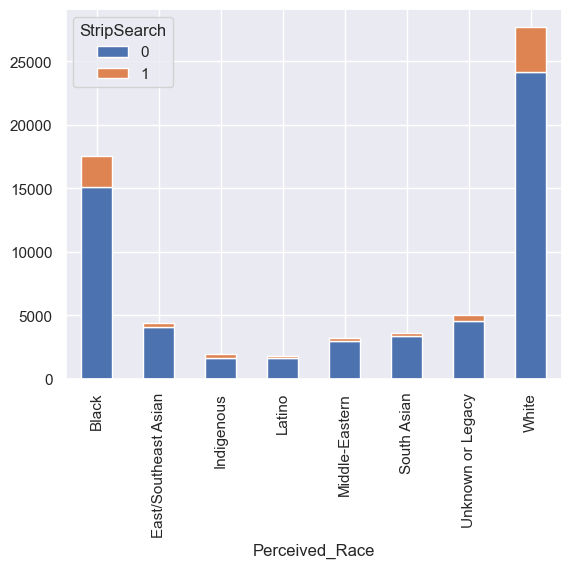

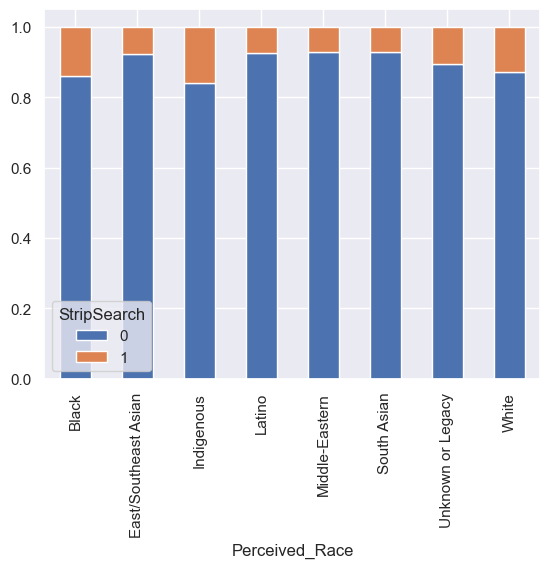

In [249]:
# create two-way frequency table
Gender=pd.crosstab(df['Perceived_Race'],df['StripSearch'])
#Stacked Column Chart Showing Percentages
Gender.plot(kind="bar", stacked=True)
#Stacked chart showing quantities
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
Gender
#Through this graph, we can see that blacks and whites are the most arrested, and blacks, aboriginals and whites account for the most

### 2.2 t-test
##################All t tests must be run separately, otherwise the numbers in the table will be overwritten exactly the same##############

#### Hypothesis 1
H0: Arrest location have no effect on the likelihood of being strip searched for both black and non-black group

H1: Arrest location have effects on the likelihood of being strip searched for both black and non-black group

ArrestLocDiv          11        12        13        14        22        23  \
Perceived_Race                                                               
Black           0.139651  0.162935  0.149758  0.251389  0.118304  0.098361   
Not black       0.119597  0.140255  0.115084  0.240300  0.097787  0.104030   

ArrestLocDiv          31        32        33        41       42        43  \
Perceived_Race                                                              
Black           0.156313  0.116711  0.145299  0.155150  0.17803  0.250585   
Not black       0.113565  0.098188  0.077670  0.128671  0.12519  0.203651   

ArrestLocDiv          51        52        53        54        55        XX  
Perceived_Race                                                              
Black           0.308550  0.230769  0.244681  0.190476  0.199336  0.060513  
Not black       0.267663  0.225314  0.206581  0.154856  0.166267  0.047505  


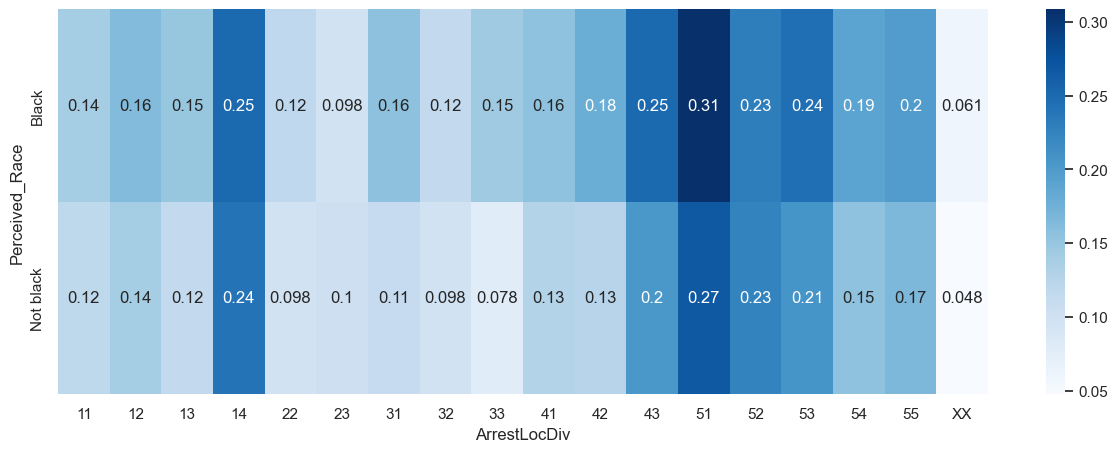

In [256]:
# Replace the values in the Race
df['Perceived_Race'] = df['Perceived_Race'].replace({'Latino': 'Not black'})
df['Perceived_Race'] = df['Perceived_Race'].replace({'East/Southeast Asian': 'Not black'})
df['Perceived_Race'] = df['Perceived_Race'].replace({'Indigenous': 'Not black'})
df['Perceived_Race'] = df['Perceived_Race'].replace({'Middle-Eastern': 'Not black'})
df['Perceived_Race'] = df['Perceived_Race'].replace({'South Asian': 'Not black'})
df['Perceived_Race'] = df['Perceived_Race'].replace({'Unknown or Legacy': 'Not black'})
df['Perceived_Race'] = df['Perceived_Race'].replace({'White': 'Not black'})
                                                                                       
# Create a cross-tabulation table
ct = pd.crosstab(df['Perceived_Race'], df['ArrestLocDiv'], values=df['StripSearch'], aggfunc='mean')
print(ct)

fig, ax = plt.subplots(figsize=(15, 5))

# Plot the cross-tabulation table
sns.heatmap(ct, annot=True, cmap='Blues')
plt.show()

In [251]:
sample1=[0.139651 , 0.162935 , 0.149758 , 0.251389 , 0.118304 , 0.098507 , 0.156313 , 0.116711 , 0.145299 , 0.155150 , 0.178368 , 0.250879]# strip search rate for black group
sample2=[0.119597 , 0.140255 , 0.115213 , 0.240401 , 0.097857 , 0.104128 , 0.267663 , 0.225314 , 0.206581 , 0.154856 , 0.166267 , 0.047529]# strip search rate for non-black group
t_stat, p_value=ttest_ind(sample1,sample2)
print("T-statistic value:",t_stat)
print("p-value",p_value)

T-statistic value: 0.13302929853191756
p-value 0.8953795208294405


#### Hypothesis 2
H0: Arrest location have no effect on the likelihood of being strip searched for both indigenous and non-indigenous group

H1: Arrest location have effects on the likelihood of being strip searched for both indigenous and non-indigenous group

ArrestLocDiv          11        12        13        14        22        23  \
Perceived_Race                                                               
Not Indigenous  0.139651  0.162935  0.149758  0.251389  0.118304  0.098507   
Not black       0.119597  0.140255  0.115213  0.240401  0.097857  0.104128   

ArrestLocDiv          31        32        33        41        42        43  \
Perceived_Race                                                               
Not Indigenous  0.156313  0.116711  0.145299  0.155150  0.178368  0.250879   
Not black       0.113654  0.098188  0.077670  0.128671  0.125190  0.203651   

ArrestLocDiv          51        52        53        54        55        XX  
Perceived_Race                                                              
Not Indigenous  0.308550  0.230769  0.244681  0.190476  0.199336  0.060554  
Not black       0.267663  0.225314  0.206581  0.154856  0.166267  0.047529  


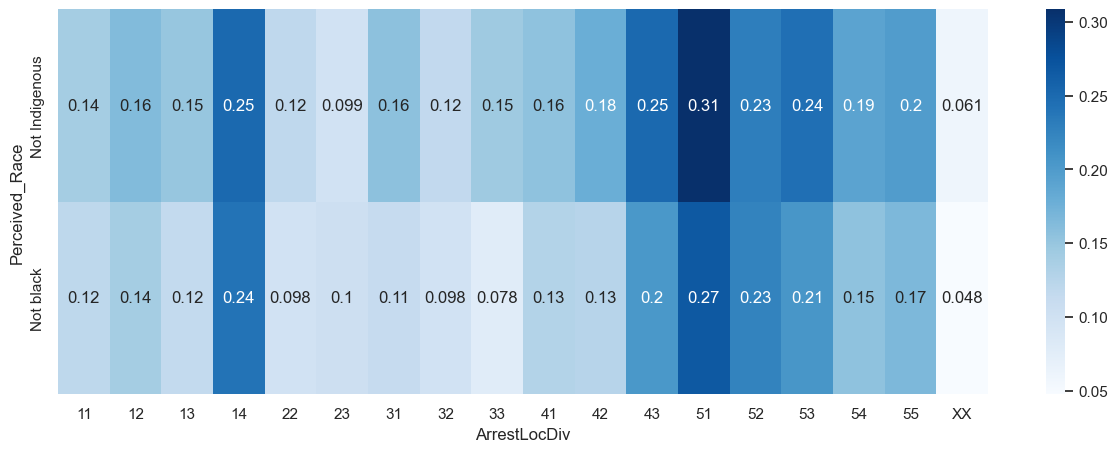

In [107]:
# Replace the values in the Race
df['Perceived_Race'] = df['Perceived_Race'].replace({'Latino': 'Not Indigenous'})
df['Perceived_Race'] = df['Perceived_Race'].replace({'East/Southeast Asian': 'Not Indigenous'})
df['Perceived_Race'] = df['Perceived_Race'].replace({'Black': 'Not Indigenous'})
df['Perceived_Race'] = df['Perceived_Race'].replace({'Middle-Eastern': 'Not Indigenous'})
df['Perceived_Race'] = df['Perceived_Race'].replace({'South Asian': 'Not Indigenous'})
df['Perceived_Race'] = df['Perceived_Race'].replace({'Unknown or Legacy': 'Not Indigenous'})
df['Perceived_Race'] = df['Perceived_Race'].replace({'White': 'Not Indigenous'})
                                                                                       
# Create a cross-tabulation table
ct = pd.crosstab(df['Perceived_Race'], df['ArrestLocDiv'], values=df['StripSearch'], aggfunc='mean')
print(ct)

fig, ax = plt.subplots(figsize=(15, 5))

# Plot the cross-tabulation table
sns.heatmap(ct, annot=True, cmap='Blues')
plt.show()

In [108]:
sample3=[0.196078 , 0.166667 , 0.134615 , 0.287582 , 0.10000 , 0.200000 , 0.050000 , 0.205882 , 0.181818 , 0.265306 , 0.080000 , 0.10000 , 0.274336 , 0.227642 , 0.365854 , 0.195652 , 0.257143 , 0.077703]# strip search rate for indigenous group
sample4=[0.121979 , 0.149407 , 0.121068 , 0.240634 , 0.10286 , 0.101104 , 0.133185 , 0.099805 , 0.093220 , 0.133925 , 0.141209 , 0.22144 , 0.281100 , 0.226432 , 0.209738 , 0.161035 , 0.168691 , 0.050002]# strip search rate for non-indigenous group
t_stat, p_value=ttest_ind(sample3,sample4)
print("T-statistic value:",t_stat)
print("p-value",p_value)

T-statistic value: 1.3717874779934274
p-value 0.17911439329002532


#### Hypothesis 3
H0: Arrest location have no effect on the likelihood of being strip searched for both white group and Not white group.

H1: Arrest location have effects on the likelihood of being strip searched for both white group and Not white group.

ArrestLocDiv          11        12        13        14        22        23  \
Perceived_Race                                                               
Not White       0.114219  0.139461  0.122486  0.211316  0.101149  0.094384   
White           0.133190  0.170313  0.120939  0.271073  0.104294  0.123348   

ArrestLocDiv          31        32        33        41        42        43  \
Perceived_Race                                                               
Not White       0.128130  0.098462  0.095827  0.127182  0.128187  0.205424   
White           0.145985  0.106599  0.090909  0.150579  0.185279  0.246277   

ArrestLocDiv          51        52        53        54        55        XX  
Perceived_Race                                                              
Not White       0.276493  0.192751  0.207792  0.142653  0.167147  0.049584  
White           0.286654  0.262877  0.221083  0.180707  0.177156  0.052422  


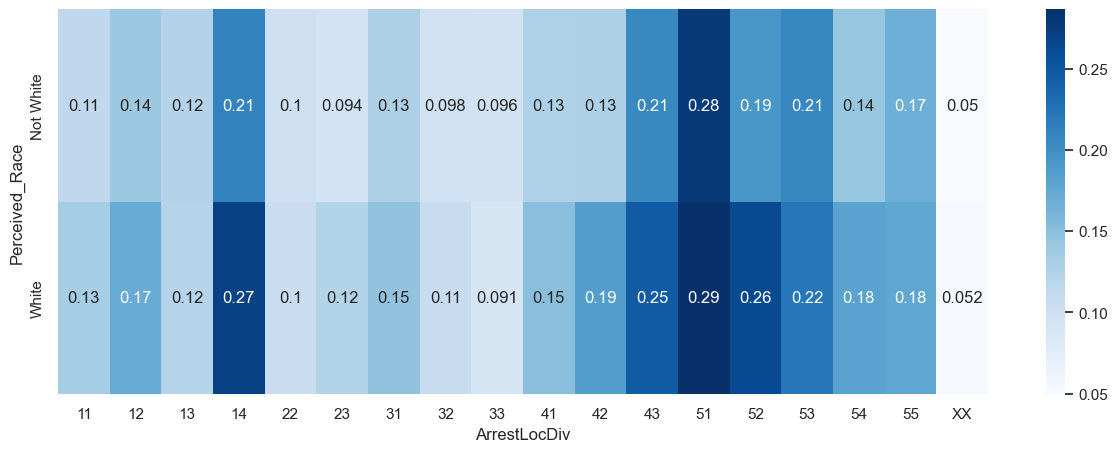

In [214]:
# Replace the values in the Race
df['Perceived_Race'] = df['Perceived_Race'].replace({'Latino': 'Not White'})
df['Perceived_Race'] = df['Perceived_Race'].replace({'East/Southeast Asian': 'Not White'})
df['Perceived_Race'] = df['Perceived_Race'].replace({'Black': 'Not White'})
df['Perceived_Race'] = df['Perceived_Race'].replace({'Middle-Eastern': 'Not White'})
df['Perceived_Race'] = df['Perceived_Race'].replace({'South Asian': 'Not White'})
df['Perceived_Race'] = df['Perceived_Race'].replace({'Unknown or Legacy': 'Not White'})
df['Perceived_Race'] = df['Perceived_Race'].replace({'Indigenous': 'Not White'})
                                                                                       
# Create a cross-tabulation table
ct = pd.crosstab(df['Perceived_Race'], df['ArrestLocDiv'], values=df['StripSearch'], aggfunc='mean')
print(ct)

fig, ax = plt.subplots(figsize=(15, 5))

# Plot the cross-tabulation table
sns.heatmap(ct, annot=True, cmap='Blues')
plt.show()

In [215]:
sample5=[0.114219 , 0.139461 , 0.122486 , 0.211316 , 0.101149 , 0.094384 , 0.128130 , 0.098462 , 0.095827 , 0.127182 , 0.128187 , 0.205424 , 0.276493 , 0.192751 , 0.207792 , 0.142653 , 0.167147 , 0.049584]# strip search rate for white group
sample6=[0.133190 , 0.170313 , 0.120939 , 0.271073 , 0.104294 , 0.123348 , 0.145985 , 0.106599 , 0.090909 , 0.150579 , 0.185279 , 0.246277 , 0.286654 , 0.262877 , 0.221083 , 0.180707 , 0.177156 , 0.052422]# strip search rate for non-white group
t_stat, p_value=ttest_ind(sample1,sample2)
print("T-statistic value:",t_stat)
print("p-value",p_value)

T-statistic value: -1.1548745903438773
p-value 0.25619419808376026


#### Hypothesis 4
H0: Arrest location have no effect on the likelihood of being strip searched for both black or indigenous or white group and Not black nor indigenous nor white group.

H1: Arrest location have effects on the likelihood of being strip searched for both black or indigenous or white group and Not black nor indigenous nor white group.

ArrestLocDiv          11        12        13        14        22        23  \
Perceived_Race                                                               
Not Indigenous  0.139651  0.162935  0.149758  0.251389  0.118304  0.098507   
Not black       0.119597  0.140255  0.115213  0.240401  0.097857  0.104128   

ArrestLocDiv          31        32        33        41        42        43  \
Perceived_Race                                                               
Not Indigenous  0.156313  0.116711  0.145299  0.155150  0.178368  0.250879   
Not black       0.113654  0.098188  0.077670  0.128671  0.125190  0.203651   

ArrestLocDiv          51        52        53        54        55        XX  
Perceived_Race                                                              
Not Indigenous  0.308550  0.230769  0.244681  0.190476  0.199336  0.060554  
Not black       0.267663  0.225314  0.206581  0.154856  0.166267  0.047529  


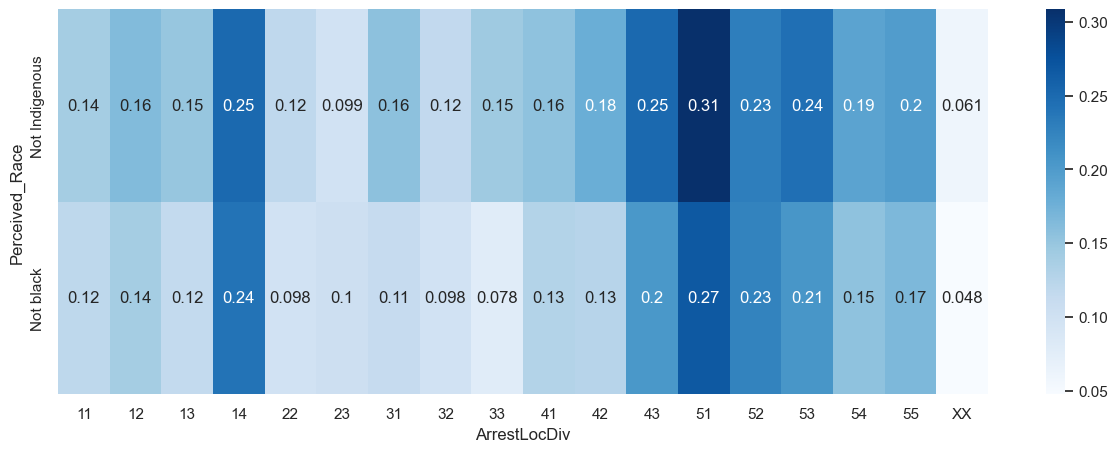

In [110]:
# Replace the values in the Race
df['Perceived_Race'] = df['Perceived_Race'].replace({'Latino': 'Not black nor indigenous nor white'})
df['Perceived_Race'] = df['Perceived_Race'].replace({'East/Southeast Asian': 'Not black nor indigenous nor white'})
df['Perceived_Race'] = df['Perceived_Race'].replace({'Middle-Eastern': 'Not black nor indigenous nor white'})
df['Perceived_Race'] = df['Perceived_Race'].replace({'South Asian': 'Not black nor indigenous nor white'})
df['Perceived_Race'] = df['Perceived_Race'].replace({'Unknown or Legacy': 'Not black nor indigenous nor white'})
df['Perceived_Race'] = df['Perceived_Race'].replace({'White': 'Black or indigenous or white'})
df['Perceived_Race'] = df['Perceived_Race'].replace({'Black': 'Black or indigenous or white'})
df['Perceived_Race'] = df['Perceived_Race'].replace({'Indigenous': 'Black or indigenous or white'})

# Create a cross-tabulation table
ct = pd.crosstab(df['Perceived_Race'], df['ArrestLocDiv'], values=df['StripSearch'], aggfunc='mean')
print(ct)

fig, ax = plt.subplots(figsize=(15, 5))

# Plot the cross-tabulation table
sns.heatmap(ct, annot=True, cmap='Blues')
plt.show()

In [111]:
sample7=[0.137383 , 0.166220 , 0.129151 , 0.266455 , 0.108516 , 0.109745 , 0.151341 , 0.112594 , 0.115732 , 0.155508 , 0.178647 , 0.244369 , 0.294859 , 0.251139 , 0.233598 , 0.184015 , 0.187144 , 0.056320]# strip search rate for Black or indigenous or white
sample8=[0.078818 , 0.090244 , 0.100694 , 0.143098 , 0.081633 , 0.087102 , 0.090129 , 0.086614 , 0.064677 , 0.091371 , 0.100111 , 0.165060 , 0.228004 , 0.152397 , 0.162162 , 0.096953 , 0.117647 , 0.036481]# strip search rate for non Black nor indigenous nor white
t_stat, p_value=ttest_ind(sample7,sample8)
print("T-statistic value:",t_stat)
print("p-value",p_value)

T-statistic value: 3.3136491341753977
p-value 0.002193981744560991


#### Hypothesis 5
H0: Gender have no effect on the likelihood of being strip searched for both black and Not black group.

H1: Gender have effects on the likelihood of being strip searched for both black and Not black group.

Sex                    F         M    U
Perceived_Race                         
Black           0.084746  0.150183  NaN
Not black       0.107094  0.113793  0.0


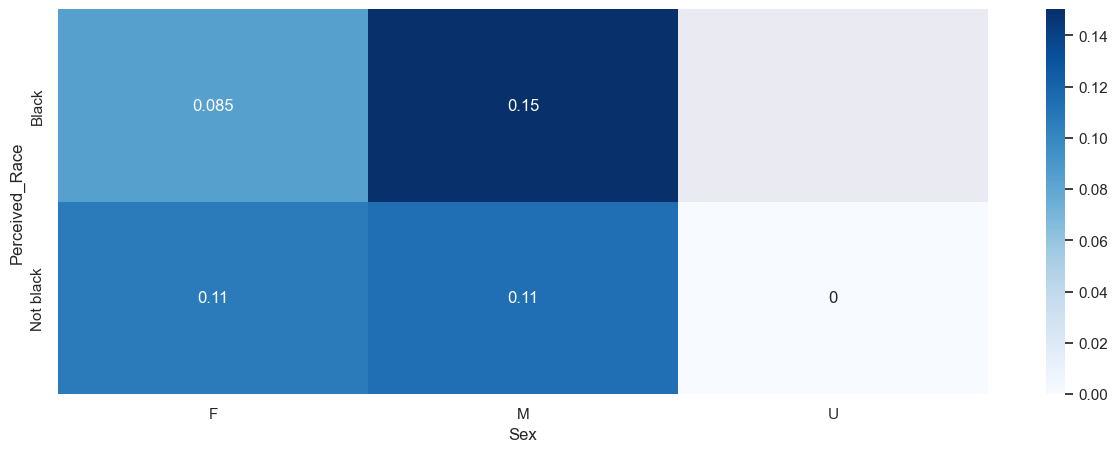

In [193]:
# Replace the values in the Race
df['Perceived_Race'] = df['Perceived_Race'].replace({'Latino': 'Not black'})
df['Perceived_Race'] = df['Perceived_Race'].replace({'East/Southeast Asian': 'Not black'})
df['Perceived_Race'] = df['Perceived_Race'].replace({'Indigenous': 'Not black'})
df['Perceived_Race'] = df['Perceived_Race'].replace({'Middle-Eastern': 'Not black'})
df['Perceived_Race'] = df['Perceived_Race'].replace({'South Asian': 'Not black'})
df['Perceived_Race'] = df['Perceived_Race'].replace({'Unknown or Legacy': 'Not black'})
df['Perceived_Race'] = df['Perceived_Race'].replace({'White': 'Not black'})
                                                                                       
# Create a cross-tabulation table
ct = pd.crosstab(df['Perceived_Race'], df['Sex'], values=df['StripSearch'], aggfunc='mean')
print(ct)

fig, ax = plt.subplots(figsize=(15, 5))

# Plot the cross-tabulation table
sns.heatmap(ct, annot=True, cmap='Blues')
plt.show()

In [199]:
sample9=[0.084746 , 0.150183]# strip search rate for Black
sample10=[0.107094 , 0.113793]# strip search rate for non Black
t_stat, p_value=ttest_ind(sample9,sample10)
print("T-statistic value:",t_stat)
print("p-value",p_value)

T-statistic value: 0.2134723668205571
p-value 0.8507430906634674


#### Hypothesis 6
H0: Gender have no effect on the likelihood of being strip searched for both indigenous and Not Indigenous group.

H1: Gender have effects on the likelihood of being strip searched for both indigenous and Not Indigenous group.

Sex                    F         M    U
Perceived_Race                         
Indigenous      0.117647  0.178051  NaN
Not Indigenous  0.100927  0.122448  0.0


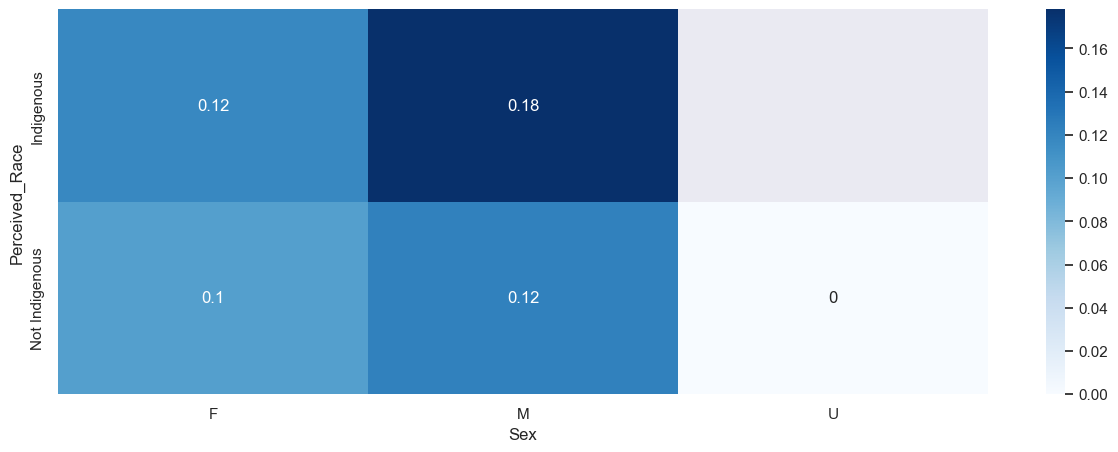

In [231]:
# Replace the values in the Race
df['Perceived_Race'] = df['Perceived_Race'].replace({'Latino': 'Not Indigenous'})
df['Perceived_Race'] = df['Perceived_Race'].replace({'East/Southeast Asian': 'Not Indigenous'})
df['Perceived_Race'] = df['Perceived_Race'].replace({'Black': 'Not Indigenous'})
df['Perceived_Race'] = df['Perceived_Race'].replace({'Middle-Eastern': 'Not Indigenous'})
df['Perceived_Race'] = df['Perceived_Race'].replace({'South Asian': 'Not Indigenous'})
df['Perceived_Race'] = df['Perceived_Race'].replace({'Unknown or Legacy': 'Not Indigenous'})
df['Perceived_Race'] = df['Perceived_Race'].replace({'White': 'Not Indigenous'})

# Create a cross-tabulation table
ct = pd.crosstab(df['Perceived_Race'], df['Sex'], values=df['StripSearch'], aggfunc='mean')
print(ct)

fig, ax = plt.subplots(figsize=(15, 5))

# Plot the cross-tabulation table
sns.heatmap(ct, annot=True, cmap='Blues')
plt.show()
                                                                                     

In [234]:
sample11=[0.117647 , 0.178051]# strip search rate for White
sample12=[0.100927 , 0.122448]# strip search rate for non White
t_stat, p_value=ttest_ind(sample11,sample12)
print("T-statistic value:",t_stat)
print("p-value",p_value)

T-statistic value: 1.1278740850626712
p-value 0.3764843804738145


## 3.Method

### 2.1 One-way anova:

In [112]:
f_oneway(sample1, sample2)

F_onewayResult(statistic=1.8818008847795715, pvalue=0.17911439329002493)

ArrestLocDiv          11        12        13        14        22        23  \
Perceived_Race                                                               
Not Indigenous  0.139651  0.162935  0.149758  0.251389  0.118304  0.098507   
Not black       0.119597  0.140255  0.115213  0.240401  0.097857  0.104128   

ArrestLocDiv          31        32        33        41        42        43  \
Perceived_Race                                                               
Not Indigenous  0.156313  0.116711  0.145299  0.155150  0.178368  0.250879   
Not black       0.113654  0.098188  0.077670  0.128671  0.125190  0.203651   

ArrestLocDiv          51        52        53        54        55        XX  
Perceived_Race                                                              
Not Indigenous  0.308550  0.230769  0.244681  0.190476  0.199336  0.060554  
Not black       0.267663  0.225314  0.206581  0.154856  0.166267  0.047529  


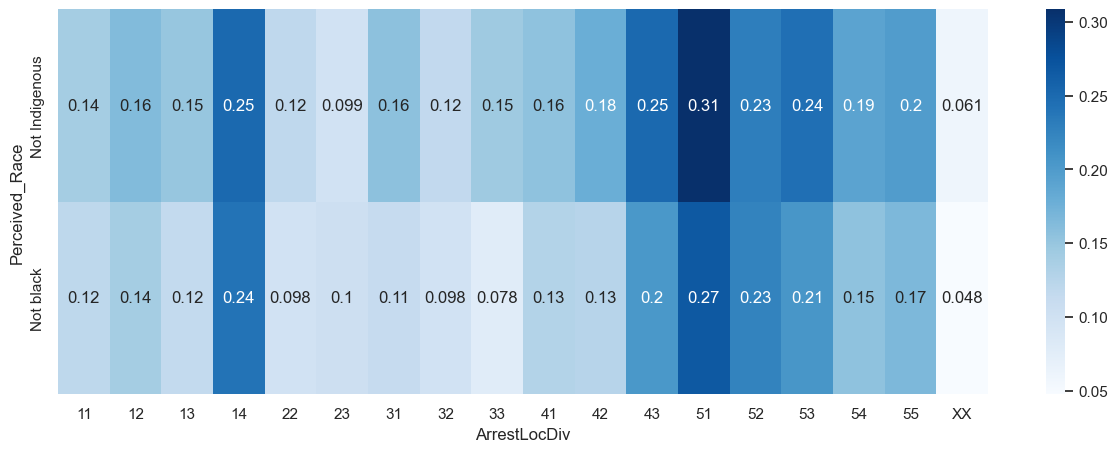

In [113]:
# Replace the values in the Race

# Create a cross-tabulation table
ct = pd.crosstab(df['Perceived_Race'], df['ArrestLocDiv'], values=df['StripSearch'], aggfunc='mean')
print(ct)

fig, ax = plt.subplots(figsize=(15, 5))

# Plot the cross-tabulation table
sns.heatmap(ct, annot=True, cmap='Blues')
plt.show()

### 2.2 Two-way anova:

In [252]:
# Create a dataframe
dataframe = pd.DataFrame({'Race': np.repeat(['daily', 'weekly'], 8),
                          'Location': np.repeat(['daily', 'weekly'], 8),
                          'rate': [0.139651 , 0.162935 , 0.149758 , 0.251389, 0.118304 , 0.098507 , 0.156313 , 0.116711,
                                  0.119597 , 0.140255 , 0.115213 , 0.240401,0.097857 , 0.104128 , 0.113654 , 0.098188]})
  
  

model = ols('rate ~ C(Race) + C(Location) +C(Race):C(Location)',
            data=dataframe).fit()
result = sm.stats.anova_lm(model, type=2)
  
# Print the result
print(result)

                       df    sum_sq   mean_sq         F    PR(>F)
C(Race)               1.0  0.001687  0.001687  0.763161  0.397079
C(Location)           1.0  0.000196  0.000196  0.088884  0.769980
C(Race):C(Location)   1.0  0.000013  0.000013  0.006000  0.939355
Residual             14.0  0.030941  0.002210       NaN       NaN


### 2.2 post-hoc tests: Tukey's HSD

In [48]:
df = pd.DataFrame({'score': [0.139651 , 0.162935 , 0.149758 , 0.251389 , 0.118304,
                             0.147059 , 0.074627 , 0.106667 , 0.192000 , 0.031250,
                             0.196078 , 0.166667 , 0.134615 , 0.287582 , 0.100000 ],
                   'group': np.repeat(['a', 'b', 'c'], repeats=5)}) 


In [248]:
turkey = pairwise_tukeyhsd(endog=df['score'],
                          groups= df['group'],
                          alpha=0.05)
print(turkey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     a      b  -0.0541 0.3844 -0.1591  0.051  False
     a      c   0.0126 0.9455 -0.0925 0.1176  False
     b      c   0.0667 0.2475 -0.0384 0.1717  False
---------------------------------------------------
